In [181]:
import operator

def getNeighbors(p, trainSet, testInstance, k):
    # p=1 : return Manhattan Distance
    # p=2 : return Eucludean Distance
    N = len(trainSet)
    distances = np.zeros(N)
    for i in range(N):
        distances[i] = getDistance(p, testInstance[:-1], trainSet[i][:-1]) # 각 trainSet마다 testInstance와의 거리 계산
    sortDist = np.argsort(distances)[:k]
    
    neighbors = []
    for i in range(k):
        neighbors.append([trainSet[sortDist[i]], distances[sortDist[i]]]) # 데이터와 해당하는 거리를 k번째까지 neighbors에 저장
    return neighbors

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
# 데이터 별 분포가 달라 정규화를 이용해 데이터를 평균이 0, 분산이 1이 되도록 만들어주었다

In [263]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import math
import warnings
warnings.filterwarnings("ignore")

iris = load_iris()

#iris.data -> features, iris.target -> labels
X = iris.data
y = iris.target

# split into test and train dataset, and use random_state=48
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=48)

trainSet = np.column_stack((X_train, y_train))
testSet = np.column_stack((X_test, y_test))

In [264]:
def getDistance(p, instance1, instance2):
    # p=1 : return Manhattan Distance
    # p=2 : return Eucludean Distance
    distance = np.sum(pow(abs(instance1 - instance2), p))
    return distance ** (1/p)

In [265]:
def getWeight(k, distance):
    weight = np.zeros(k)
    sum = 0
    for i in range(k):
        weight[i] += 1 / distance[i]
        sum += weight[i]
    return weight / sum

In [266]:
import operator

def getNeighbors(p, trainSet, testInstance, k):
    # p=1 : return Manhattan Distance
    # p=2 : return Eucludean Distance
    distances = []
    for i in range(len(trainSet)):
        dist = getDistance(p, trainSet[i][:-1], testInstance[:-1]) # 각 trainSet마다 testInstance와의 거리 계산
        distances.append([trainSet[i], dist])
    distances.sort(key=operator.itemgetter(1)) # 거리를 기준으로 정렬
    
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i]) # 데이터를 k번째까지 neighbors에 저장
    return neighbors

In [267]:
def getResponse(neighbors, weightKnn):
    classVotes = {}
    neighbors = np.array(neighbors)
    weight = getWeight(k, neighbors[:, -1])
    for i in range(len(neighbors)):
        response = neighbors[i][0][-1]
        if response in classVotes:
            if weightKnn == True:
                classVotes[response] += 1 * weight[i]
            else:
                classVotes[response] += 1
        else:
            classVotes[response] = 1
    vote = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return vote[0][0] # 가장 투표를 많이 받은 클래스 리턴

In [268]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    accuracy = (correct/len(testSet)) * 100.0
    return accuracy

In [271]:
k=3
p=2

predictions=[]

for i in range(len(testSet)):
    neighbors = getNeighbors(p, trainSet, testSet[i], k)
    result = getResponse(neighbors, True)
    predictions.append(result)
    print(str(i) + ' > predicted : ' + str(result) + ', actual : ' + str(testSet[i][-1]))

0 > predicted : 1.0, actual : 1.0
1 > predicted : 1.0, actual : 1.0
2 > predicted : 2.0, actual : 2.0
3 > predicted : 0.0, actual : 0.0
4 > predicted : 1.0, actual : 1.0
5 > predicted : 2.0, actual : 2.0
6 > predicted : 0.0, actual : 0.0
7 > predicted : 1.0, actual : 2.0
8 > predicted : 0.0, actual : 0.0
9 > predicted : 1.0, actual : 1.0
10 > predicted : 2.0, actual : 2.0
11 > predicted : 0.0, actual : 0.0
12 > predicted : 0.0, actual : 0.0
13 > predicted : 2.0, actual : 2.0
14 > predicted : 1.0, actual : 1.0
15 > predicted : 1.0, actual : 1.0
16 > predicted : 0.0, actual : 0.0
17 > predicted : 1.0, actual : 1.0
18 > predicted : 2.0, actual : 1.0
19 > predicted : 2.0, actual : 2.0
20 > predicted : 0.0, actual : 0.0
21 > predicted : 2.0, actual : 2.0
22 > predicted : 1.0, actual : 1.0
23 > predicted : 1.0, actual : 1.0
24 > predicted : 2.0, actual : 2.0
25 > predicted : 0.0, actual : 0.0
26 > predicted : 0.0, actual : 0.0
27 > predicted : 2.0, actual : 2.0
28 > predicted : 2.0, actual :

In [272]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + str(accuracy) + '%')

Accuracy: 95.55555555555556%


In [279]:
k_range = range(1, 31)
k_scores = []

In [280]:
for k in k_range:
    predictions=[]
    for i in range(len(testSet)):
        neighbors = getNeighbors(p, trainSet, testSet[i], k)
        result = getResponse(neighbors, True)
        predictions.append(result)
    k_scores.append(getAccuracy(testSet, predictions))

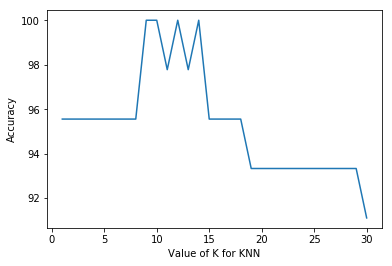

In [282]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()